In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import time
from datetime import date, datetime, timedelta

import random
import math

from typing import Dict, List, Tuple
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('Commercial_Vehicle_Orders_Synthetic_Dataset.csv', keep_default_na=False)
df

,order_id,order_date,customer_id,product_id,quantity,product_category,vehicle_model,vehicle_class,configuration,color,...,season,is_holiday_period,demand_factor,promo_available,promo_category,promo_value_discount,promo_value_rebate_usd,promo_applied,storage_holding_cost_usd,late_delivery_penalty_usd
0,CV-2023-045821,2023-06-01,CUST-10012,BS26656,5,Bus,Transit Bus 40ft,City Bus,"Low Floor, Diesel, 280HP",Green,...,Summer,False,1.3,False,N/A,0.00,0,N/A,0.000000,0.0
1,CV-2023-045821,2023-06-01,CUST-10012,BS22492,5,Bus,Transit Bus 40ft,City Bus,"Low Floor, Diesel, 280HP",Black,...,Summer,False,1.3,False,N/A,0.00,0,N/A,0.000000,0.0
2,CV-2023-045822,2023-06-01,CUST-10012,TR79562,1,Truck,eCascadia,Class 8 Truck,"Electric, Day Cab, 470HP",Green,...,Summer,False,1.0,True,Volume,1.72,2000,True,2205.584597,0.0
3,CV-2023-045823,2023-06-01,CUST-10017,BS27669,5,Bus,School Bus C2,School Bus,"Type C, Diesel, 240HP",Red,...,Summer,False,1.3,False,N/A,0.00,0,N/A,790.343818,0.0
4,CV-2023-045824,2023-06-01,CUST-10017,BS25918,20,Bus,Transit Bus 60ft,City Bus,"Articulated, Hybrid, 330HP",Black,...,Summer,False,1.3,False,N/A,0.00,0,N/A,0.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60152,CV-2025-083337,2025-05-30,CUST-10049,PT66084,1,Powertrain,DD15 Engine,Heavy Duty Engine,"14.8L, 505HP, EPA 2021",Blue,...,Spring,False,1.2,False,N/A,0.00,0,N/A,0.000000,0.0
60153,CV-2025-083337,2025-05-30,CUST-10049,TR78241,1,Truck,LT Series,Class 7 Truck,"Extended Cab, Auto Trans, 360HP",White,...,Spring,False,1.2,True,Federal Holiday,3.55,0,False,0.000000,0.0
60154,CV-2025-083337,2025-05-30,CUST-10049,TR78739,1,Truck,Cascadia DD15,Class 8 Truck,"Sleeper Cab, Auto Trans, 455HP",Black,...,Spring,False,1.2,False,N/A,0.00,0,N/A,0.000000,0.0
60155,CV-2025-083338,2025-05-30,CUST-10014,BS22599,5,Bus,Transit Bus 40ft,City Bus,"Low Floor, Diesel, 280HP",Black,...,Spring,False,1.2,False,N/A,0.00,0,N/A,0.000000,0.0


In [3]:
# Date columns parsing
date_columns = []

for column in df.columns: 
    if "_date" in column.lower(): 
        try: 
            df[column] = pd.to_datetime(df[column], format='mixed')
            date_columns.append(column)
        except: 
            pass 
        
date_columns

['order_date',
 'requested_delivery_date',
 'planned_delivery_date',
 'actual_delivery_date',
 'cancellation_date',
 'planned_production_start_date',
 'actual_production_start_date',
 'planned_production_end_date',
 'actual_production_end_date',
 'engineering_approval_date',
 'constraint_start_date',
 'expected_resolution_date']

In [4]:
main_date_column = 'order_date'
main_date_column

'order_date'

In [5]:
# ID columns parsing
id_columns = []
for column in df.columns: 
    if "_id" in column.lower(): 
        id_columns.append(column)
for column in id_columns:
    df[column] = df[column].astype('object')
    
id_columns

['order_id', 'customer_id', 'product_id']

# Prompts 1-4 (Simple Pandas Queries)

In [6]:
current_date = date.today()
current_month = current_date.month
current_year = current_date.year
print (current_month, current_year)
if current_month >= 10: 
    current_period = str(current_year) + str('-') + str(current_month)
else: 
    current_period = str(current_year) + str('-0') + str(current_month)
print (current_period)

5 2025
2025-05


## Prompt 1

In [7]:
# Orders placed in current month
print(f"\nPROMPT 1: Please help identify the orders for this month.")
current_month_orders = df[df['order_date'].dt.strftime('%Y-%m') == current_period]

# Summary statistics
unique_orders = current_month_orders['order_id'].nunique()    # Number of orders placed
total_line_items = len(current_month_orders)    # Number of rows (each row is one product in an order)
total_units = current_month_orders['quantity'].sum()    # Total units ordered
total_value = current_month_orders['order_value_usd'].sum()

print(f"\nOrders for {current_date.strftime('%B %Y')}")
print("-"*40)
print(f"• Unique Orders: {unique_orders:,}")
print(f"• Total Line Items: {total_line_items:,}")
print(f"• Total Units Ordered: {total_units:,}")  
print(f"• Total Order Value: ${total_value:,.2f}")
print(f"\nBreakdown by Product Category:")
print(current_month_orders['product_category'].value_counts())
print(f"\nBreakdown by Customer Type:")
print(current_month_orders['customer_type'].value_counts())


PROMPT 1: Please help identify the orders for this month.

Orders for May 2025
----------------------------------------
• Unique Orders: 1,147
• Total Line Items: 1,840
• Total Units Ordered: 5,661
• Total Order Value: $1,070,004,147.28

Breakdown by Product Category:
product_category
Truck         1097
Powertrain     451
Bus            292
Name: count, dtype: int64

Breakdown by Customer Type:
customer_type
Individual    1163
Fleet          317
Government     188
Dealer         172
Name: count, dtype: int64


In [8]:
# Verifying the above
current_month_orders = df[df['order_date'].dt.to_period('M')=='2025-05'].copy().reset_index(drop=True)
current_month_orders

,order_id,order_date,customer_id,product_id,quantity,product_category,vehicle_model,vehicle_class,configuration,color,...,season,is_holiday_period,demand_factor,promo_available,promo_category,promo_value_discount,promo_value_rebate_usd,promo_applied,storage_holding_cost_usd,late_delivery_penalty_usd
0,CV-2025-082193,2025-05-05,CUST-10046,TR74357,1,Truck,Western Star 57X,Class 8 Truck,"Sleeper Cab, Manual Trans, 505HP",Blue,...,Spring,False,1.2,False,N/A,0.00,0,N/A,0.0,0.0
1,CV-2025-082194,2025-05-05,CUST-10069,PT60876,1,Powertrain,DD15 Engine,Heavy Duty Engine,"14.8L, 505HP, EPA 2021",Yellow,...,Spring,False,1.2,False,N/A,0.00,0,N/A,0.0,0.0
2,CV-2025-082194,2025-05-05,CUST-10069,BS21031,1,Bus,Coach Bus J4500,Coach Bus,"Luxury, Diesel, 450HP",Silver,...,Spring,False,1.2,True,Summer Special,3.36,3000,True,0.0,0.0
3,CV-2025-082194,2025-05-05,CUST-10069,PT69511,1,Powertrain,DT12 Transmission,Automated Manual,"12-Speed, Direct Drive",Green,...,Spring,False,1.2,False,N/A,0.00,0,N/A,0.0,0.0
4,CV-2025-082195,2025-05-05,CUST-10029,PT67460,1,Powertrain,X15 Engine,Heavy Duty Engine,"15L, 605HP, EPA 2021",Yellow,...,Spring,False,1.2,False,N/A,0.00,0,N/A,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1835,CV-2025-083337,2025-05-30,CUST-10049,PT66084,1,Powertrain,DD15 Engine,Heavy Duty Engine,"14.8L, 505HP, EPA 2021",Blue,...,Spring,False,1.2,False,N/A,0.00,0,N/A,0.0,0.0
1836,CV-2025-083337,2025-05-30,CUST-10049,TR78241,1,Truck,LT Series,Class 7 Truck,"Extended Cab, Auto Trans, 360HP",White,...,Spring,False,1.2,True,Federal Holiday,3.55,0,False,0.0,0.0
1837,CV-2025-083337,2025-05-30,CUST-10049,TR78739,1,Truck,Cascadia DD15,Class 8 Truck,"Sleeper Cab, Auto Trans, 455HP",Black,...,Spring,False,1.2,False,N/A,0.00,0,N/A,0.0,0.0
1838,CV-2025-083338,2025-05-30,CUST-10014,BS22599,5,Bus,Transit Bus 40ft,City Bus,"Low Floor, Diesel, 280HP",Black,...,Spring,False,1.2,False,N/A,0.00,0,N/A,0.0,0.0


In [9]:
print (current_month_orders['order_id'].nunique())
print (len(current_month_orders))
print (current_month_orders['quantity'].sum())
print (round(current_month_orders['order_value_usd'].sum(), 2))

print()
print (current_month_orders['product_category'].value_counts())

print()
print (current_month_orders['customer_type'].value_counts())

1147
1840
5661
1070004147.28

product_category
Truck         1097
Powertrain     451
Bus            292
Name: count, dtype: int64

customer_type
Individual    1163
Fleet          317
Government     188
Dealer         172
Name: count, dtype: int64


## Prompt 2

In [10]:
# Completed orders in current month (based on delivery date)
print(f"\nPROMPT 2: How much revenue did we generate from accomplished orders during current month?")
completed_this_month = df[(df['order_status'] == 'Completed') & (df['actual_delivery_date'].dt.strftime('%Y-%m') == current_period)]

# Revenue calculation
revenue_recognized = completed_this_month['order_value_usd'].sum()
completed_orders = completed_this_month['order_id'].nunique()

print(f"\nRevenue from Completed Orders in {current_date.strftime('%B %Y')}")
print("-"*40)
print(f"• Completed Orders: {completed_orders:,}")
print(f"• Revenue Recognized: ${revenue_recognized:,.2f}")
print(f"\nRevenue by Product Category:")
revenue_by_product = completed_this_month.groupby('product_category')['order_value_usd'].sum().sort_values(ascending=False)
for product, revenue in revenue_by_product.items():
    print(f"  - {product}: ${revenue:,.2f} ({revenue/revenue_recognized*100:.1f}%)")


PROMPT 2: How much revenue did we generate from accomplished orders during current month?

Revenue from Completed Orders in May 2025
----------------------------------------
• Completed Orders: 1,956
• Revenue Recognized: $1,343,099,864.49

Revenue by Product Category:
  - Truck: $777,783,532.33 (57.9%)
  - Bus: $539,550,481.47 (40.2%)
  - Powertrain: $25,765,850.69 (1.9%)


In [11]:
# Verifying the above
current_month_completed_orders = df[(df['actual_delivery_date'].dt.to_period('M')=='2025-05') & (df['order_status']=='Completed')].copy().reset_index(drop=True)
current_month_completed_orders

,order_id,order_date,customer_id,product_id,quantity,product_category,vehicle_model,vehicle_class,configuration,color,...,season,is_holiday_period,demand_factor,promo_available,promo_category,promo_value_discount,promo_value_rebate_usd,promo_applied,storage_holding_cost_usd,late_delivery_penalty_usd
0,CV-2024-070542,2024-09-20,CUST-10027,BS28364,1,Bus,Coach Bus J4500,Coach Bus,"Luxury, Diesel, 450HP",Yellow,...,Fall,False,1.1,False,N/A,0.00,0,N/A,4453.806935,0.0
1,CV-2024-072258,2024-10-25,CUST-10027,TR75491,1,Truck,M2 106,Class 6 Truck,"Crew Cab, Auto Trans, 300HP",Green,...,Fall,False,1.1,False,N/A,0.00,0,N/A,2724.033496,0.0
2,CV-2024-072761,2024-11-06,CUST-10012,BS28092,5,Bus,Transit Bus 60ft,City Bus,"Articulated, Hybrid, 330HP",White,...,Fall,True,1.1,False,N/A,0.00,0,N/A,0.000000,0.0
3,CV-2024-072809,2024-11-06,CUST-10018,BS20392,5,Bus,Electric Transit 35ft,City Bus,"Electric, Low Floor, 350HP",Black,...,Fall,True,1.1,False,N/A,0.00,0,N/A,0.000000,0.0
4,CV-2024-072939,2024-11-08,CUST-10039,TR79594,1,Truck,M2 106,Class 6 Truck,"Crew Cab, Auto Trans, 300HP",Red,...,Fall,True,1.1,True,Year-End,2.82,0,True,0.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2383,CV-2025-081886,2025-04-24,CUST-10061,PT62757,1,Powertrain,X15 Engine,Heavy Duty Engine,"15L, 605HP, EPA 2021",Black,...,Spring,False,1.2,False,N/A,0.00,0,N/A,712.707622,0.0
2384,CV-2025-081920,2025-04-28,CUST-10064,TR73606,1,Truck,LT Series,Class 7 Truck,"Extended Cab, Auto Trans, 360HP",Silver,...,Spring,False,1.2,False,N/A,0.00,0,N/A,0.000000,0.0
2385,CV-2025-081994,2025-04-29,FLEET-10005,PT68301,2,Powertrain,X12 Engine,Heavy Duty Engine,"12L, 500HP, EPA 2021",Yellow,...,Spring,False,1.2,False,N/A,0.00,0,N/A,1071.448140,0.0
2386,CV-2025-082148,2025-04-30,CUST-10065,PT65090,1,Powertrain,X12 Engine,Heavy Duty Engine,"12L, 500HP, EPA 2021",White,...,Spring,False,1.2,False,N/A,0.00,0,N/A,1774.269381,0.0


In [12]:
print (current_month_completed_orders['order_id'].nunique())
current_month_completed_revenue = round(current_month_completed_orders['order_value_usd'].sum(), 2)
print (current_month_completed_revenue)

print()
for product_category in current_month_completed_orders['product_category'].unique(): 
    product_category_revenue = round(current_month_completed_orders[current_month_completed_orders['product_category']==product_category]['order_value_usd'].sum(), 2)
    print(product_category, product_category_revenue, round(product_category_revenue*100/current_month_completed_revenue, 1))

1956
1343099864.49

Bus 539550481.47 40.2
Truck 777783532.33 57.9
Powertrain 25765850.69 1.9


## Prompt 3

### Overall


PROMPT 3: What are the top five challenges delaying orders?

Top 5 Challenges Delaying Orders
----------------------------------------
                        Total_Orders_Affected  Total_Revenue_Impact  \
primary_delay_category                                                
Production                              10113          3.085520e+09   
Parts/Material                           3987          1.414621e+09   
Engineering                               665          4.778865e+08   
Quality                                   174          5.355304e+07   
Customer                                   61          2.088626e+07   

                        Avg_Delay_Days  
primary_delay_category                  
Production                       16.95  
Parts/Material                   28.49  
Engineering                      28.90  
Quality                          29.48  
Customer                         27.41  


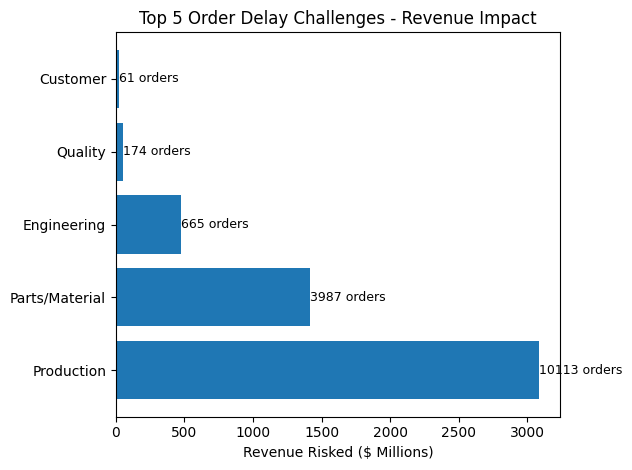

In [13]:
# Overall delays (may be completed, but definitely delayed)
print(f"\nPROMPT 3: What are the top five challenges delaying orders?")

all_delays = df[df['is_delayed'] == True]

# Analyze delay categories across all delayed orders
delay_analysis = all_delays.groupby('primary_delay_category').agg({'order_id': 'nunique', 
                                                                   'order_value_usd': 'sum', 
                                                                   'delay_days': 'mean'}).round(2)

delay_analysis.columns = ['Total_Orders_Affected', 'Total_Revenue_Impact', 'Avg_Delay_Days']
delay_analysis = delay_analysis.sort_values('Total_Orders_Affected', ascending=False)

print(f"\nTop 5 Challenges Delaying Orders")
print("-"*40)
print(delay_analysis.head())

# Visualize
# plt.figure(figsize=(10, 6))
top_5_delays = delay_analysis.head()
plt.barh(top_5_delays.index, top_5_delays['Total_Revenue_Impact'] / 1_000_000)
plt.xlabel('Revenue Risked ($ Millions)')
plt.title('Top 5 Order Delay Challenges - Revenue Impact')

for i, (idx, row) in enumerate(top_5_delays.iterrows()):
    plt.text(row['Total_Revenue_Impact']/1_000_000 + 0.5, i, f"{int(row['Total_Orders_Affected'])} orders", va='center', fontsize=9)
plt.tight_layout()
plt.show()

### For Active Orders


PROMPT 3: What are the top five challenges delaying orders?
Top 5 Challenges Causing Delays:
                        Order_Count  Revenue_At_Risk  Avg_Delay_Days
primary_delay_category                                              
Production                      248      88843448.38           11.25
Parts/Material                  136      41952785.45           18.27
Engineering                      22      12978444.79           24.36
Quality                           6        483258.79           20.50
Customer                          1         92207.74            1.00


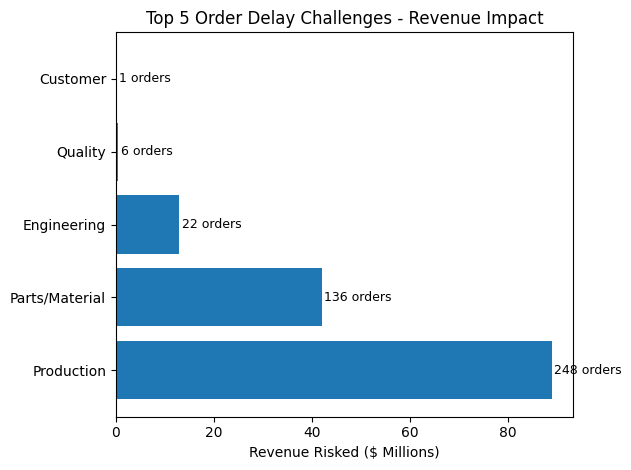

In [14]:
# Active delays (not completed, but delayed)
print(f"\nPROMPT 3: What are the top five challenges delaying orders?")

# Active delays (not completed orders)
active_delays = df[(df['is_delayed'] == True) & (df['order_status'].isin(['Pending', 'In_Production']))]

# Top delay categories
delay_analysis = active_delays.groupby('primary_delay_category').agg({'order_id': 'count', 
                                                                      'order_value_usd': 'sum', 
                                                                      'delay_days': 'mean'}).round(2)

delay_analysis.columns = ['Order_Count', 'Revenue_At_Risk', 'Avg_Delay_Days']
delay_analysis = delay_analysis.sort_values('Revenue_At_Risk', ascending=False)

print("Top 5 Challenges Causing Delays:")
print(delay_analysis.head())

# Visualize
# plt.figure(figsize=(10, 6))
top_5_delays = delay_analysis.head()
plt.barh(top_5_delays.index, top_5_delays['Revenue_At_Risk'] / 1_000_000)
plt.xlabel('Revenue Risked ($ Millions)')
plt.title('Top 5 Order Delay Challenges - Revenue Impact')

for i, (idx, row) in enumerate(top_5_delays.iterrows()):
    plt.text(row['Revenue_At_Risk']/1_000_000 + 0.5, i, f"{int(row['Order_Count'])} orders", va='center', fontsize=9)
plt.tight_layout()
plt.show()

## Prompt 4

### Overall


PROMPT 4: How much revenue is impacted because of these challenges (asked in the previous question)?

Revenue Impact Analysis
----------------------------------------
• Total Orders: 37,519
• Delayed Orders: 14,179 (37.8%)
• Total Revenue Risked: $5,081,799,124.40

Revenue Impact by Delay Severity:
                       Revenue_Risked  Order_Count  Avg_Delay_Days
delay_impact_severity                                             
Medium                   1.976455e+09         5747           21.79
High                     1.502331e+09         3922           32.67
Low                      1.162524e+09         5249            8.08
Critical                 4.404887e+08          528           45.50

Revenue Impact by Customer Tier:
               Revenue_Risked  Order_Count  Avg_Order_Value
customer_tier                                              
Gold             1.853427e+09         1406       1318226.72
Bronze           1.593510e+09         8011        198915.24
Silver           1.4738

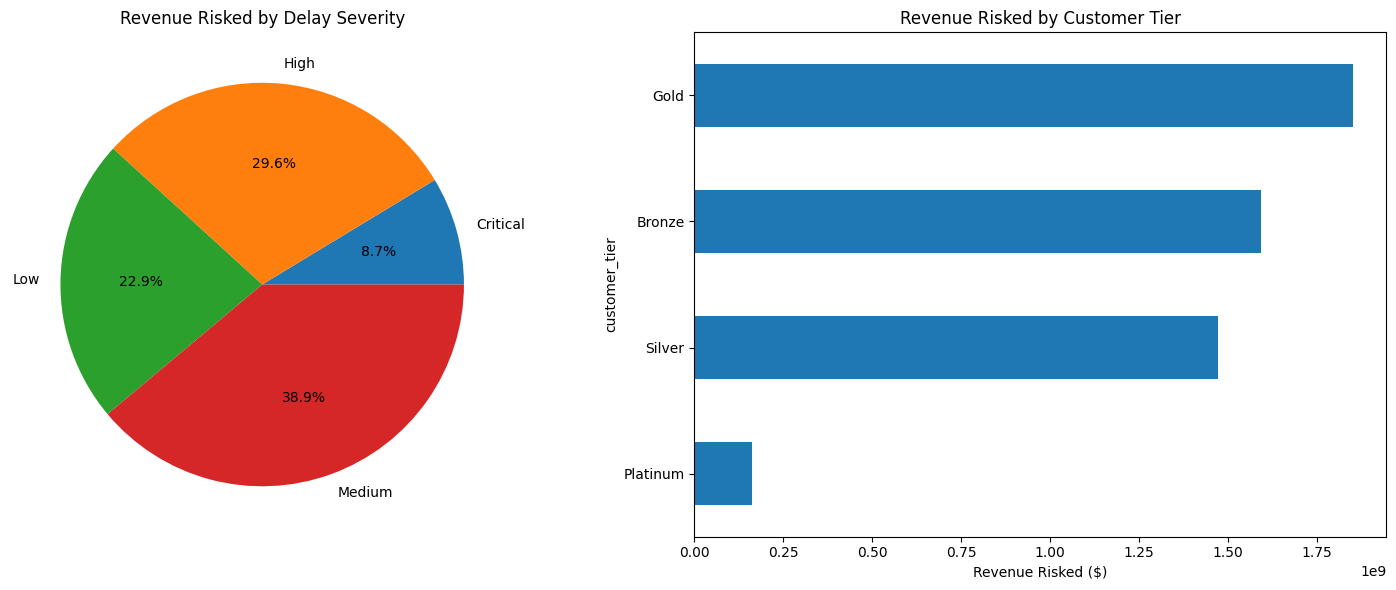

In [15]:
# Detailed revenue impact analysis
print(f"\nPROMPT 4: How much revenue is impacted because of these challenges (asked in the previous question)?")

print(f"\nRevenue Impact Analysis")
print("-"*40)

# Overall impact
total_orders = df['order_id'].nunique()
total_delayed_orders = all_delays['order_id'].nunique()
total_revenue_risked = all_delays['order_value_usd'].sum()

print(f"• Total Orders: {total_orders:,}")
print(f"• Delayed Orders: {total_delayed_orders:,} ({total_delayed_orders/total_orders*100:.1f}%)")
print(f"• Total Revenue Risked: ${total_revenue_risked:,.2f}")

# Impact by severity
print(f"\nRevenue Impact by Delay Severity:")
severity_impact = all_delays.groupby('delay_impact_severity').agg({'order_value_usd': 'sum', 
                                                                      'order_id': 'nunique', 
                                                                      'delay_days': 'mean'}).round(2)
severity_impact.columns = ['Revenue_Risked', 'Order_Count', 'Avg_Delay_Days']
print(severity_impact.sort_values('Revenue_Risked', ascending=False))

# Customer tier impact
print(f"\nRevenue Impact by Customer Tier:")
tier_impact = all_delays.groupby('customer_tier').agg({'order_value_usd': 'sum', 'order_id': 'nunique'}).round(2)
tier_impact.columns = ['Revenue_Risked', 'Order_Count']
tier_impact['Avg_Order_Value'] = (tier_impact['Revenue_Risked'] / tier_impact['Order_Count']).round(2)
print(tier_impact.sort_values('Revenue_Risked', ascending=False))

# Create combined visualization
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# Severity pie chart
severity_impact['Revenue_Risked'].plot(kind='pie', ax=ax1, autopct='%1.1f%%')
ax1.set_title('Revenue Risked by Delay Severity')
ax1.set_ylabel('')

# Customer tier bar chart
tier_impact['Revenue_Risked'].sort_values().plot(kind='barh', ax=ax2)
ax2.set_xlabel('Revenue Risked ($)')
ax2.set_title('Revenue Risked by Customer Tier')

plt.tight_layout()
plt.show()

### For Active Orders


PROMPT 4: How much revenue is impacted because of these challenges (asked in the previous question)?

Revenue Impact Analysis
----------------------------------------
• Total Active Orders: 4,856
• Delayed Orders: 401 (8.3%)
• Total Revenue at Risk: $144,350,145.14

Revenue Impact by Delay Severity:
                       Revenue_At_Risk  Order_Count  Avg_Delay_Days
delay_impact_severity                                              
Low                        62594959.98          177            7.14
Medium                     52418996.54          114           18.12
High                       21369822.22           93           19.62
Critical                    7966366.40           24           30.58

Revenue Impact by Customer Tier:
               Revenue_At_Risk  Order_Count  Avg_Order_Value
customer_tier                                               
Gold               65041297.20           32       2032540.54
Bronze             36950335.27          245        150817.69
Silver      

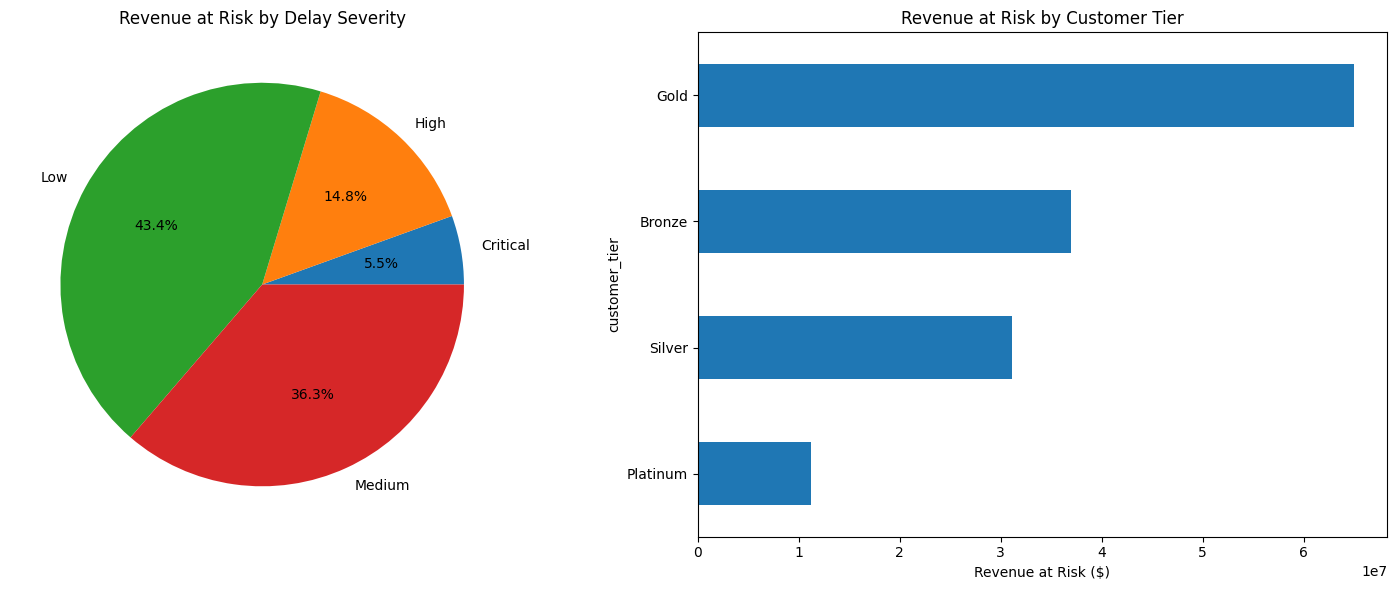

In [16]:
# Detailed revenue impact analysis
print(f"\nPROMPT 4: How much revenue is impacted because of these challenges (asked in the previous question)?")

print(f"\nRevenue Impact Analysis")
print("-"*40)

# Overall impact
total_active_orders = df[df['order_status'].isin(['Pending', 'In_Production'])]['order_id'].nunique()
total_delayed_orders = active_delays['order_id'].nunique()
total_revenue_at_risk = active_delays['order_value_usd'].sum()

print(f"• Total Active Orders: {total_active_orders:,}")
print(f"• Delayed Orders: {total_delayed_orders:,} ({total_delayed_orders/total_active_orders*100:.1f}%)")
print(f"• Total Revenue at Risk: ${total_revenue_at_risk:,.2f}")

# Impact by severity
print(f"\nRevenue Impact by Delay Severity:")
severity_impact = active_delays.groupby('delay_impact_severity').agg({'order_value_usd': 'sum', 
                                                                      'order_id': 'nunique', 
                                                                      'delay_days': 'mean'}).round(2)
severity_impact.columns = ['Revenue_At_Risk', 'Order_Count', 'Avg_Delay_Days']
print(severity_impact.sort_values('Revenue_At_Risk', ascending=False))

# Customer tier impact
print(f"\nRevenue Impact by Customer Tier:")
tier_impact = active_delays.groupby('customer_tier').agg({'order_value_usd': 'sum', 'order_id': 'nunique'}).round(2)
tier_impact.columns = ['Revenue_At_Risk', 'Order_Count']
tier_impact['Avg_Order_Value'] = (tier_impact['Revenue_At_Risk'] / tier_impact['Order_Count']).round(2)
print(tier_impact.sort_values('Revenue_At_Risk', ascending=False))

# Create combined visualization
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# Severity pie chart
severity_impact['Revenue_At_Risk'].plot(kind='pie', ax=ax1, autopct='%1.1f%%')
ax1.set_title('Revenue at Risk by Delay Severity')
ax1.set_ylabel('')

# Customer tier bar chart
tier_impact['Revenue_At_Risk'].sort_values().plot(kind='barh', ax=ax2)
ax2.set_xlabel('Revenue at Risk ($)')
ax2.set_title('Revenue at Risk by Customer Tier')

plt.tight_layout()
plt.show()

# Prompt 5 and beyond (Prioritization and Prediction)

In [17]:
print ('PROMPT 5: Can you share order prioritization for this month?')

PROMPT 5: Can you share order prioritization for this month?


In [18]:
class PredictiveOrderPrioritizationEngine:
    """AI-Powered Predictive Order Prioritization System for Commercial Vehicle Orders
    
    Focuses on: Revenue/Profit, Customer Relationships, and Reputation
    Predicts delay risks and prioritizes orders proactively before constraints become delays
    
    Handles New vs Pre-owned vehicle processing paths with different risk profiles"""
    
    def __init__(self, df):
        self.df = df.copy()
        self.current_date = pd.Timestamp.now()
        self.active_orders = None
        self.prioritized_orders = None
        
        # Convert date columns
        date_columns = ['order_date', 'requested_delivery_date', 'planned_delivery_date', 
                       'actual_delivery_date', 'planned_production_start_date', 
                       'actual_production_start_date', 'planned_production_end_date',
                       'actual_production_end_date', 'engineering_approval_date',
                       'constraint_start_date', 'expected_resolution_date']
        
        for col in date_columns:
            if col in self.df.columns:
                self.df[col] = pd.to_datetime(self.df[col], errors='coerce')
    
    
    def get_active_orders(self, current_month_only=True):
        """
        Get orders that are still active (not completed/canceled) and need prioritization
        If current_month_only=True, focus on orders due this month or overdue
        """
        # Filter for active orders
        active_mask = self.df['order_status'].isin(['In_Production', 'Pending'])
        
        if current_month_only:
            # Include orders due this month or overdue
            current_month = self.current_date.month
            current_year = self.current_date.year
            
            delivery_this_month = (
                (self.df['requested_delivery_date'].dt.month == current_month) & 
                (self.df['requested_delivery_date'].dt.year == current_year)
            )
            
            overdue = self.df['requested_delivery_date'] < self.current_date
            
            time_mask = delivery_this_month | overdue
            active_mask = active_mask & time_mask
        
        self.active_orders = self.df[active_mask].copy()
        print(f"Found {len(self.active_orders)} active orders for prioritization")
        
        # Add derived fields for analysis
        self.active_orders = self._add_derived_fields(self.active_orders)
        return self.active_orders
    
    
    def _add_derived_fields(self, df):
        """Add calculated fields for better analysis"""
        df = df.copy()
        
        # Days until requested delivery
        df['days_until_delivery'] = (df['requested_delivery_date'] - self.current_date).dt.days
        
        # Is order overdue
        df['is_overdue'] = df['days_until_delivery'] < 0
        
        # Convert string fields to numeric where needed
        df['cycle_time_days'] = pd.to_numeric(df['cycle_time_days'], errors='coerce')
        df['quality_score'] = pd.to_numeric(df['quality_score'], errors='coerce')
        df['resolution_days'] = pd.to_numeric(df['resolution_days'], errors='coerce')
        df['fleet_size'] = pd.to_numeric(df['fleet_size'], errors='coerce')
        
        # Fill NaN values with reasonable defaults
        df['quality_score'] = df['quality_score'].fillna(95.0)  # Assume good quality if missing
        df['fleet_size'] = df['fleet_size'].fillna(1.0)  # Individual customer if missing
        
        return df
    
    
    def predict_delay_risk(self, row):
        """Predict delay risk based on comprehensive constraint analysis
        Returns: (delay_probability, expected_delay_days, risk_factors)"""
        
        delay_probability = 0.0
        expected_delay_days = 0
        risk_factors = []
        
        # 1. ENGINEERING CONSTRAINTS
        eng_status = str(row.get('engineering_status', '')).lower()
        if eng_status == 'pending':
            delay_probability += 0.7
            expected_delay_days += 21
            risk_factors.append("Engineering approval pending")
        elif eng_status == 'in_review':
            delay_probability += 0.4
            expected_delay_days += 10
            risk_factors.append("Engineering under review")
        
        if row.get('custom_engineering_required', False):
            delay_probability += 0.5
            expected_delay_days += 15
            risk_factors.append("Custom engineering required")
        
        # Technical complexity impact
        tech_score = row.get('technical_complexity_score', 0)
        if tech_score >= 8:
            delay_probability += 0.6
            expected_delay_days += 12
            risk_factors.append("Very high technical complexity")
        elif tech_score >= 6:
            delay_probability += 0.3
            expected_delay_days += 7
            risk_factors.append("High technical complexity")
        
        # 2. PARTS & SUPPLY CHAIN CONSTRAINTS
        parts_avail = row.get('parts_availability', 100)
        if parts_avail < 75:
            delay_probability += 0.8
            expected_delay_days += 20
            risk_factors.append(f"Low parts availability ({parts_avail:.1f}%)")
        elif parts_avail < 90:
            delay_probability += 0.4
            expected_delay_days += 8
            risk_factors.append("Moderate parts shortage risk")
        
        supply_risk = row.get('supply_risk_score', 1)
        if supply_risk >= 8:
            delay_probability += 0.7
            expected_delay_days += 18
            risk_factors.append("Critical supply chain risk")
        elif supply_risk >= 6:
            delay_probability += 0.4
            expected_delay_days += 10
            risk_factors.append("High supply chain risk")
        elif supply_risk >= 4:
            delay_probability += 0.2
            expected_delay_days += 5
            risk_factors.append("Moderate supply risk")
        
        # Supplier-specific issues
        supplier_issues = str(row.get('key_supplier_issues', '')).lower()
        if supplier_issues not in ['n/a', '', 'nan']:
            if 'bankruptcy' in supplier_issues:
                delay_probability += 0.9
                expected_delay_days += 30
                risk_factors.append("Supplier bankruptcy risk")
            elif 'strike' in supplier_issues:
                delay_probability += 0.6
                expected_delay_days += 15
                risk_factors.append("Labor strike impact")
            elif 'shortage' in supplier_issues:
                delay_probability += 0.5
                expected_delay_days += 12
                risk_factors.append("Material shortage")
            else:
                delay_probability += 0.3
                expected_delay_days += 7
                risk_factors.append("Supplier issues present")
        
        # 3. PRODUCTION CAPACITY CONSTRAINTS
        capacity_avail = row.get('capacity_available_percent', 100)
        if capacity_avail < 10:
            delay_probability += 0.8
            expected_delay_days += 25
            risk_factors.append("Critical capacity shortage")
        elif capacity_avail < 20:
            delay_probability += 0.5
            expected_delay_days += 12
            risk_factors.append("Limited production capacity")
        elif capacity_avail < 30:
            delay_probability += 0.2
            expected_delay_days += 5
            risk_factors.append("Tight production schedule")
        
        # Competing orders impact
        competing = row.get('competing_orders_count', 0)
        if competing > 200:
            delay_probability += 0.4
            expected_delay_days += 8
            risk_factors.append("High order competition")
        elif competing > 100:
            delay_probability += 0.2
            expected_delay_days += 4
            risk_factors.append("Moderate order competition")
        
        # 4. BUILD COMPLEXITY CONSTRAINTS
        complexity = str(row.get('build_complexity', '')).lower()
        if complexity == 'complex':
            delay_probability += 0.6
            expected_delay_days += 15
            risk_factors.append("Complex build requirements")
        elif complexity == 'custom':
            delay_probability += 0.3
            expected_delay_days += 8
            risk_factors.append("Custom build specifications")
        
        labor_hours = row.get('labor_hours_required', 0)
        if labor_hours > 5000:
            delay_probability += 0.4
            expected_delay_days += 10
            risk_factors.append("High labor hour requirements")
        elif labor_hours > 3000:
            delay_probability += 0.2
            expected_delay_days += 5
            risk_factors.append("Significant labor requirements")
        
        # 5. CONDITION-SPECIFIC RISKS (New vs Pre-owned)
        condition = str(row.get('condition', '')).lower()
        if condition == 'pre-owned':
            age = row.get('age', 0)
            miles = row.get('miles_driven', 0)
            quality_score = row.get('quality_score', 95)
            
            # Age and mileage impact
            if age > 4 or miles > 200000:
                delay_probability += 0.4
                expected_delay_days += 12
                risk_factors.append("High-mileage/aged pre-owned vehicle")
            elif age > 2 or miles > 100000:
                delay_probability += 0.2
                expected_delay_days += 6
                risk_factors.append("Moderate wear pre-owned vehicle")
            
            # Quality concerns
            if quality_score < 80:
                delay_probability += 0.6
                expected_delay_days += 18
                risk_factors.append("Quality concerns on pre-owned")
            elif quality_score < 90:
                delay_probability += 0.3
                expected_delay_days += 8
                risk_factors.append("Moderate quality issues")
            
            # Rework requirements
            rework = str(row.get('rework_required', '')).lower()
            if rework == 'true':
                delay_probability += 0.7
                expected_delay_days += 20
                risk_factors.append("Rework required")
        
        # 6. QUALITY & INSPECTION RISKS
        quality_status = str(row.get('quality_check_status', '')).lower()
        if quality_status == 'failed':
            delay_probability += 0.8
            expected_delay_days += 15
            risk_factors.append("Failed quality check")
        elif quality_status == 'pending':
            delay_probability += 0.3
            expected_delay_days += 7
            risk_factors.append("Quality check pending")
        elif quality_status == 'in_progress':
            delay_probability += 0.2
            expected_delay_days += 4
            risk_factors.append("Quality check in progress")
        
        # 7. HISTORICAL CONSTRAINT PATTERNS
        prev_constraints = row.get('previous_constraints_count', 0)
        if prev_constraints > 10:
            delay_probability += 0.6
            expected_delay_days += 12
            risk_factors.append("History of chronic constraints")
        elif prev_constraints > 5:
            delay_probability += 0.3
            expected_delay_days += 6
            risk_factors.append("History of constraints")
        elif prev_constraints > 2:
            delay_probability += 0.1
            expected_delay_days += 2
            risk_factors.append("Some previous constraints")
        
        # 8. TIMELINE PRESSURE
        days_until = row.get('days_until_delivery', 0)
        if days_until < 0:  # Overdue
            delay_probability += 0.9
            expected_delay_days += abs(days_until)
            risk_factors.append(f"Already overdue by {abs(days_until)} days")
        elif days_until < 14:
            delay_probability += 0.4
            expected_delay_days += 7
            risk_factors.append("Tight delivery timeline")
        elif days_until < 30:
            delay_probability += 0.2
            expected_delay_days += 3
            risk_factors.append("Moderate timeline pressure")
        
        # Cap probability at 95%
        delay_probability = min(delay_probability, 0.95)
        
        return delay_probability, expected_delay_days, risk_factors
    
    
    def calculate_revenue_priority_score(self, row):
        """Revenue/Profit impact scoring with predictive elements"""
        score = 0
        
        # 1. Base order value impact (25 points)
        order_value = row.get('order_value_usd', 0)
        if order_value > 1000000:
            score += 25
        elif order_value > 500000:
            score += 20
        elif order_value > 200000:
            score += 15
        elif order_value > 100000:
            score += 10
        elif order_value > 50000:
            score += 5
        
        # 2. Predicted revenue at risk (25 points)
        delay_prob, expected_days, _ = self.predict_delay_risk(row)
        
        # Calculate potential penalties and storage costs
        potential_penalty = row.get('late_delivery_penalty_usd', 0) * delay_prob
        storage_daily = row.get('storage_holding_cost_usd', 0) / 30  # Assume monthly storage
        potential_storage = storage_daily * expected_days * delay_prob
        total_risk = potential_penalty + potential_storage
        
        if total_risk > 100000:
            score += 25
        elif total_risk > 50000:
            score += 20
        elif total_risk > 20000:
            score += 15
        elif total_risk > 10000:
            score += 10
        elif total_risk > 5000:
            score += 5
        
        # 3. Profit margin protection (20 points)
        profit_margin = row.get('profit_margin_percent', 0)
        if profit_margin > 30:
            score += 20
        elif profit_margin > 20:
            score += 15
        elif profit_margin > 10:
            score += 10
        elif profit_margin > 5:
            score += 5
        
        # 4. Rush order premium at risk (15 points)
        rush_premium = row.get('rush_order_premium_usd', 0)
        if rush_premium > 100000:
            score += 15
        elif rush_premium > 50000:
            score += 12
        elif rush_premium > 20000:
            score += 8
        elif rush_premium > 10000:
            score += 5
        elif rush_premium > 0:
            score += 3
        
        # 5. Payment terms risk (10 points)
        payment_terms = row.get('payment_terms_days', 0)
        credit_rating = str(row.get('customer_credit_rating', '')).upper()
        
        if payment_terms == 0 and credit_rating in ['AAA', 'AA']:  # Advance payment, good credit
            score += 10
        elif payment_terms <= 30 and credit_rating in ['AAA', 'AA', 'A']:
            score += 7
        elif payment_terms <= 60:
            score += 5
        else:
            score += 2
        
        # 6. Currency risk (5 points)
        currency = str(row.get('currency', '')).upper()
        if currency == 'USD':
            score += 5
        elif currency == 'CAD':
            score += 3
        
        return min(score, 100)
    
    
    def calculate_customer_priority_score(self, row):
        """Customer relationship priority with relationship protection focus"""
        score = 0
        
        # 1. Customer tier (30 points)
        tier = str(row.get('customer_tier', '')).lower()
        if tier == 'platinum':
            score += 30
        elif tier == 'gold':
            score += 22
        elif tier == 'silver':
            score += 15
        elif tier == 'bronze':
            score += 8
        
        # 2. Customer type and visibility (25 points)
        customer_type = str(row.get('customer_type', '')).lower()
        if customer_type == 'government':
            score += 25  # Government = high visibility
        elif customer_type == 'fleet':
            score += 20  # Fleet = high volume potential
        elif customer_type == 'dealer':
            score += 15  # Dealer = channel partner
        elif customer_type == 'individual':
            score += 8
        
        # 3. Customer relationship value (20 points)
        previous_orders = row.get('previous_orders_count', 0)
        ytd_revenue = row.get('customer_revenue_ytd', 0)
        
        if previous_orders > 50 and ytd_revenue > 10000000:
            score += 20
        elif previous_orders > 20 and ytd_revenue > 5000000:
            score += 17
        elif previous_orders > 10 and ytd_revenue > 1000000:
            score += 14
        elif previous_orders > 5 and ytd_revenue > 500000:
            score += 10
        elif previous_orders > 1:
            score += 6
        elif previous_orders > 0:
            score += 3
        
        # 4. Customer satisfaction risk (15 points)
        satisfaction = row.get('customer_satisfaction', 5.0)
        delay_prob, _, _ = self.predict_delay_risk(row)
        
        # At-risk customers need immediate attention
        if satisfaction < 3.5:
            score += 15
        elif satisfaction < 4.0 and delay_prob > 0.5:
            score += 12
        elif satisfaction < 4.5 and delay_prob > 0.3:
            score += 8
        elif satisfaction >= 4.5:
            score += 5  # Keep good customers happy
        
        # 5. Fleet size impact (10 points)
        fleet_size = row.get('fleet_size', 1)
        if fleet_size > 1000:
            score += 10
        elif fleet_size > 500:
            score += 8
        elif fleet_size > 100:
            score += 6
        elif fleet_size > 50:
            score += 4
        elif fleet_size > 10:
            score += 2
        
        return min(score, 100)
    
    
    def calculate_reputation_priority_score(self, row):
        """Reputation/public image risk with proactive assessment"""
        score = 0
        
        # 1. Public visibility amplification (35 points)
        customer_type = str(row.get('customer_type', '')).lower()
        product_category = str(row.get('product_category', '')).lower()
        vehicle_model = str(row.get('vehicle_model', '')).lower()
        customer_name = str(row.get('customer_name', '')).lower()
        
        # Government contracts = maximum visibility
        if customer_type == 'government':
            if 'federal' in customer_name or 'gsa' in customer_name:
                score += 35  # Federal government = national visibility
            elif 'state' in customer_name or 'dot' in customer_name:
                score += 30  # State government = regional visibility
            else:
                score += 25  # Local government = community visibility
        
        # School bus delays = community impact
        elif 'school' in vehicle_model and product_category == 'bus':
            score += 32  # School transportation delays affect families
        
        # Large fleet operations = industry visibility
        elif customer_type == 'fleet':
            fleet_size = row.get('fleet_size', 1)
            if fleet_size > 1000:
                score += 28  # Major fleet = industry news
            elif fleet_size > 500:
                score += 22
            elif fleet_size > 100:
                score += 18
            else:
                score += 12
        
        # Public transit = community impact
        elif product_category == 'bus' and 'transit' in vehicle_model:
            score += 25  # Public transit delays affect communities
        
        # 2. Predicted escalation and media risk (25 points)
        delay_prob, expected_days, _ = self.predict_delay_risk(row)
        order_value = row.get('order_value_usd', 0)
        
        # High-value + high-probability delays = escalation risk
        if delay_prob > 0.7 and order_value > 1000000:
            score += 25
        elif delay_prob > 0.6 and order_value > 500000:
            score += 20
        elif delay_prob > 0.5 and order_value > 200000:
            score += 15
        elif delay_prob > 0.4 and expected_days > 14:
            score += 10
        elif delay_prob > 0.3:
            score += 5
        
        # 3. Historical escalation patterns (20 points)
        prev_constraints = row.get('previous_constraints_count', 0)
        escalation = str(row.get('escalation_level', '')).lower()
        
        if prev_constraints > 15:  # Chronic issues = reputation damage
            score += 20
        elif prev_constraints > 10:
            score += 15
        elif prev_constraints > 5:
            score += 10
        elif prev_constraints > 2:
            score += 5
        
        # Current escalation level
        if escalation == 'director':
            score += 15  # Already escalated high
        elif escalation == 'manager':
            score += 10
        elif escalation == 'supervisor':
            score += 5
        
        # 4. Seasonal and timing sensitivity (10 points)
        season = str(row.get('season', '')).lower()
        is_holiday = row.get('is_holiday_period', False)
        days_until = row.get('days_until_delivery', 0)
        
        # School bus timing is critical
        if 'school' in vehicle_model:
            if season == 'summer':  # School year prep
                score += 10
            elif season == 'spring':  # End of school year
                score += 7
        
        # Holiday period deliveries
        if is_holiday and days_until < 30:
            score += 8
        
        # Winter weather impact
        if season == 'winter' and product_category in ['bus', 'truck']:
            score += 5
        
        # 5. Overdue orders (10 points)
        if days_until < 0:  # Already overdue
            overdue_days = abs(days_until)
            if overdue_days > 30:
                score += 10
            elif overdue_days > 14:
                score += 7
            elif overdue_days > 7:
                score += 5
            else:
                score += 3
        
        return min(score, 100)
    
    
    def calculate_intervention_feasibility_score(self, row):
        """How feasible is it to intervene and prevent/minimize predicted delays"""
        score = 0
        
        # 1. Engineering intervention potential (25 points)
        eng_status = str(row.get('engineering_status', '')).lower()
        custom_required = row.get('custom_engineering_required', False)
        
        if eng_status == 'approved' and not custom_required:
            score += 25  # No engineering blockers
        elif eng_status == 'approved' and custom_required:
            score += 20  # Approved but custom work
        elif eng_status == 'in_review':
            score += 12  # Can potentially expedite
        elif eng_status == 'pending':
            score += 5   # Requires significant intervention
        
        # 2. Supply chain intervention potential (25 points)
        parts_avail = row.get('parts_availability', 100)
        supply_risk = row.get('supply_risk_score', 1)
        sourcing_status = str(row.get('component_sourcing_status', '')).lower()
        
        if parts_avail >= 95 and supply_risk <= 3 and sourcing_status == 'in_house':
            score += 25  # Excellent supply situation
        elif parts_avail >= 90 and supply_risk <= 5:
            score += 20  # Good supply situation
        elif parts_avail >= 80 and supply_risk <= 7:
            score += 15  # Manageable supply issues
        elif parts_avail >= 70:
            score += 8   # Challenging but possible
        else:
            score += 3   # Very difficult supply situation
        
        # 3. Production capacity flexibility (20 points)
        capacity_avail = row.get('capacity_available_percent', 100)
        complexity = str(row.get('build_complexity', '')).lower()
        labor_hours = row.get('labor_hours_required', 0)
        
        if capacity_avail > 25 and complexity == 'standard' and labor_hours < 1000:
            score += 20  # Easy to slot in
        elif capacity_avail > 20 and complexity != 'complex':
            score += 15  # Good flexibility
        elif capacity_avail > 15:
            score += 10  # Moderate flexibility
        elif capacity_avail > 10:
            score += 6   # Limited flexibility
        else:
            score += 2   # Very constrained
        
        # 4. Quality intervention potential (15 points)
        quality_status = str(row.get('quality_check_status', '')).lower()
        quality_score = row.get('quality_score', 95)
        rework_required = str(row.get('rework_required', '')).lower()
        
        if quality_status == 'passed' and quality_score > 95 and rework_required != 'true':
            score += 15  # No quality issues
        elif quality_status in ['passed', 'n/a'] and quality_score > 90:
            score += 12  # Minor quality concerns
        elif quality_status == 'in_progress':
            score += 8   # Can expedite quality process
        elif quality_status == 'pending':
            score += 5   # Quality check intervention needed
        else:
            score += 2   # Significant quality issues
        
        # 5. Timeline intervention potential (15 points)
        days_until = row.get('days_until_delivery', 0)
        order_priority = str(row.get('order_priority', '')).lower()
        
        if days_until > 60:
            score += 15  # Plenty of time for intervention
        elif days_until > 30:
            score += 12  # Good buffer for intervention
        elif days_until > 14:
            score += 8   # Some time for intervention
        elif days_until > 7:
            score += 5   # Limited intervention time
        elif days_until > 0:
            score += 2   # Very limited time
        else:
            score += 1   # Already overdue, damage control mode
        
        # Priority orders get intervention boost
        if order_priority == 'critical':
            score += 5
        elif order_priority == 'high':
            score += 3
        
        return min(score, 100)
    
    
    def prioritize_orders(self, weights=None):
        """
        Main prioritization function with predictive scoring
        Default weights: Revenue=35%, Customer=30%, Reputation=25%, Feasibility=10%
        """
        if weights is None:
            weights = {
                'revenue': 0.35,
                'customer': 0.30, 
                'reputation': 0.25,
                'feasibility': 0.10
            }
        
        if self.active_orders is None:
            self.get_active_orders()
        
        if len(self.active_orders) == 0:
            print("No active orders found for prioritization")
            return pd.DataFrame()
        
        # Calculate individual priority scores
        print("Calculating revenue priority scores...")
        self.active_orders['revenue_score'] = self.active_orders.apply(
            self.calculate_revenue_priority_score, axis=1)
        
        print("Calculating customer priority scores...")
        self.active_orders['customer_score'] = self.active_orders.apply(
            self.calculate_customer_priority_score, axis=1)
        
        print("Calculating reputation priority scores...")
        self.active_orders['reputation_score'] = self.active_orders.apply(
            self.calculate_reputation_priority_score, axis=1)
        
        print("Calculating intervention feasibility scores...")
        self.active_orders['feasibility_score'] = self.active_orders.apply(
            self.calculate_intervention_feasibility_score, axis=1)
        
        # Calculate delay predictions
        print("Predicting delay risks...")
        delay_predictions = self.active_orders.apply(self.predict_delay_risk, axis=1)
        self.active_orders['predicted_delay_probability'] = delay_predictions.apply(lambda x: x[0])
        self.active_orders['predicted_delay_days'] = delay_predictions.apply(lambda x: x[1])
        self.active_orders['risk_factors'] = delay_predictions.apply(lambda x: '; '.join(x[2]))
        
        # Calculate composite priority score
        self.active_orders['priority_score'] = (
            self.active_orders['revenue_score'] * weights['revenue'] +
            self.active_orders['customer_score'] * weights['customer'] +
            self.active_orders['reputation_score'] * weights['reputation'] +
            self.active_orders['feasibility_score'] * weights['feasibility']
        )
        
        # Add priority reasoning
        self.active_orders['priority_reason'] = self.active_orders.apply(
            self._generate_priority_reason, axis=1)
        
        # Sort by priority score
        self.prioritized_orders = self.active_orders.sort_values(
            'priority_score', ascending=False).reset_index(drop=True)
        
        print(f"Prioritization complete! {len(self.prioritized_orders)} orders ranked.")
        return self.prioritized_orders
    
    
    def _generate_priority_reason(self, row):
        """Generate human-readable reason for prioritization"""
        reasons = []
        
        # High-impact reasons
        if row['revenue_score'] > 70:
            if row.get('order_value_usd', 0) > 1000000:
                reasons.append("High-value order ($1M+)")
            if row.get('predicted_delay_probability', 0) > 0.6:
                reasons.append("High revenue at risk")
        
        if row['customer_score'] > 70:
            if row.get('customer_tier', '').lower() == 'platinum':
                reasons.append("Platinum customer")
            if row.get('customer_type', '').lower() == 'government':
                reasons.append("Government contract")
        
        if row['reputation_score'] > 60:
            if 'school' in str(row.get('vehicle_model', '')).lower():
                reasons.append("School bus delivery")
            if row.get('predicted_delay_probability', 0) > 0.5:
                reasons.append("High delay risk")
            if row.get('days_until_delivery', 0) < 0:
                reasons.append("Already overdue")
        
        if row['feasibility_score'] > 70:
            reasons.append("High intervention potential")
        elif row['feasibility_score'] < 30:
            reasons.append("Complex constraints")
        
        # Delay-specific reasons
        delay_prob = row.get('predicted_delay_probability', 0)
        if delay_prob > 0.7:
            reasons.append("Critical delay risk")
        elif delay_prob > 0.5:
            reasons.append("Significant delay risk")
        
        return "; ".join(reasons) if reasons else "Standard priority"
    
    
    def get_top_priorities(self, n=20):
        """Get top N priority orders with detailed analysis"""
        if self.prioritized_orders is None:
            self.prioritize_orders()
        
        if len(self.prioritized_orders) == 0:
            return pd.DataFrame()
        
        columns = [
            'order_id', 'customer_name', 'customer_tier', 'customer_type',
            'product_category', 'vehicle_model', 'condition', 'order_value_usd',
            'days_until_delivery', 'is_overdue', 'engineering_status', 
            'parts_availability', 'build_complexity', 'predicted_delay_probability',
            'predicted_delay_days', 'priority_score', 'revenue_score', 
            'customer_score', 'reputation_score', 'feasibility_score', 
            'priority_reason', 'risk_factors'
        ]
        
        available_columns = [col for col in columns if col in self.prioritized_orders.columns]
        return self.prioritized_orders[available_columns].head(n)
    
    
    def generate_executive_summary(self):
        """Generate executive summary of prioritization results"""
        if self.prioritized_orders is None:
            self.prioritize_orders()
        
        if len(self.prioritized_orders) == 0:
            return "No active orders found for prioritization."
        
        total_orders = len(self.prioritized_orders)
        high_priority = len(self.prioritized_orders[self.prioritized_orders['priority_score'] > 70])
        critical_delay_risk = len(self.prioritized_orders[self.prioritized_orders['predicted_delay_probability'] > 0.7])
        overdue_orders = len(self.prioritized_orders[self.prioritized_orders['is_overdue'] == True])
        
        total_value_at_risk = self.prioritized_orders['order_value_usd'].sum()
        avg_priority_score = self.prioritized_orders['priority_score'].mean()
        avg_delay_risk = self.prioritized_orders['predicted_delay_probability'].mean()
        
        # Customer tier breakdown
        tier_breakdown = self.prioritized_orders['customer_tier'].value_counts()
        
        # Key constraint categories
        eng_pending = len(self.prioritized_orders[
            self.prioritized_orders['engineering_status'] == 'Pending'])
        parts_shortage = len(self.prioritized_orders[
            self.prioritized_orders['parts_availability'] < 90])
        complex_builds = len(self.prioritized_orders[
            self.prioritized_orders['build_complexity'] == 'Complex'])
        
        # Condition breakdown
        condition_breakdown = self.prioritized_orders['condition'].value_counts()
        
        summary = "\n" + f"""PREDICTIVE ORDER PRIORITIZATION EXECUTIVE SUMMARY
====================================================

ACTIVE ORDERS OVERVIEW:
• Total Active Orders: {total_orders:,}
• High Priority Orders (Score >70): {high_priority:,}
• Critical Delay Risk (>70% probability): {critical_delay_risk:,}
• Already Overdue: {overdue_orders:,}
• Total Value at Risk: ${total_value_at_risk:,.0f}

RISK METRICS:
• Average Priority Score: {avg_priority_score:.1f}/100
• Average Delay Risk: {avg_delay_risk:.1%}

CUSTOMER BREAKDOWN:
{tier_breakdown.to_string()}

VEHICLE CONDITION:
{condition_breakdown.to_string()}

KEY CONSTRAINT AREAS:
• Engineering Approvals Pending: {eng_pending:,} orders
• Parts Availability Issues (<90%): {parts_shortage:,} orders
• Complex Build Requirements: {complex_builds:,} orders

IMMEDIATE ACTIONS NEEDED:
• Focus on top 15 priority orders for maximum impact
• Address overdue orders immediately for reputation protection
• Expedite engineering approvals for pending orders
• Secure parts for high-priority orders with supply risks

PREDICTIVE INSIGHTS:
The AI system has identified orders at risk BEFORE they become delays,
enabling proactive intervention rather than reactive damage control."""

        return summary
    
    
    def analyze_risk_factors(self):
        """Analyze the most common risk factors across all orders"""
        if self.prioritized_orders is None:
            self.prioritize_orders()
        
        if len(self.prioritized_orders) == 0:
            return "No active orders to analyze."
        
        # Extract individual risk factors
        all_risk_factors = []
        for risk_list in self.prioritized_orders['risk_factors']:
            if pd.notna(risk_list) and risk_list.strip():
                factors = [factor.strip() for factor in risk_list.split(';')]
                all_risk_factors.extend(factors)
        
        # Count risk factor frequency
        from collections import Counter
        risk_counter = Counter(all_risk_factors)
        
        print("\nTOP RISK FACTORS ACROSS ALL ACTIVE ORDERS:")
        print("=" * 55)
        for risk, count in risk_counter.most_common(10):
            percentage = (count / len(self.prioritized_orders)) * 100
            print(f"• {risk}: {count} orders ({percentage:.1f}%)")
        
        return risk_counter
    
    
    def get_intervention_recommendations(self, top_n=10):
        """Generate specific intervention recommendations for top priority orders"""
        if self.prioritized_orders is None:
            self.prioritize_orders()
        
        if len(self.prioritized_orders) == 0:
            return []
        
        recommendations = []
        top_orders = self.prioritized_orders.head(top_n)
        
        for idx, row in top_orders.iterrows():
            order_id = row['order_id']
            recommendations.append({
                'order_id': order_id,
                'customer': row['customer_name'],
                'priority_score': row['priority_score'],
                'delay_risk': row['predicted_delay_probability'],
                'interventions': self._generate_interventions(row)
            })
        
        return recommendations
    
    
    def _generate_interventions(self, row):
        """Generate specific intervention recommendations for an order"""
        interventions = []
        
        # Engineering interventions
        if row.get('engineering_status') == 'Pending':
            interventions.append("URGENT: Expedite engineering approval process")
        elif row.get('engineering_status') == 'In_Review':
            interventions.append("Fast-track engineering review")
        
        # Supply chain interventions
        parts_avail = row.get('parts_availability', 100)
        if parts_avail < 80:
            interventions.append(f"CRITICAL: Secure parts (only {parts_avail:.1f}% available)")
        elif parts_avail < 95:
            interventions.append(f"Monitor parts availability ({parts_avail:.1f}%)")
        
        # Production interventions
        capacity = row.get('capacity_available_percent', 100)
        if capacity < 15:
            interventions.append("Consider overtime or line reallocation")
        
        # Quality interventions
        quality_status = row.get('quality_check_status', '')
        if quality_status == 'Failed':
            interventions.append("URGENT: Address quality issues immediately")
        elif quality_status == 'Pending':
            interventions.append("Expedite quality inspection")
        
        # Customer communication
        if row.get('is_overdue'):
            interventions.append("IMMEDIATE: Customer communication required")
        elif row.get('predicted_delay_probability', 0) > 0.6:
            interventions.append("Proactive customer notification recommended")
        
        # Timeline interventions
        days_until = row.get('days_until_delivery', 0)
        if days_until < 14 and row.get('predicted_delay_probability', 0) > 0.5:
            interventions.append("URGENT: Implement crash timeline")
        
        return interventions

In [19]:
# Usage functions for easy implementation
def run_predictive_prioritization(df, current_month_only=True, top_n=20):
    """
    Main function to run predictive order prioritization analysis
    
    Parameters:
    - df: DataFrame with order data
    - current_month_only: Focus on orders due this month or overdue
    - top_n: Number of top priority orders to return
    
    Returns:
    - Dictionary with analysis results
    """
    print("Starting AI-Powered Predictive Order Prioritization...")
    print("=" * 60)
    
    # Initialize the engine
    engine = PredictiveOrderPrioritizationEngine(df)
    
    # Get active orders
    active_orders = engine.get_active_orders(current_month_only=current_month_only)
    
    if len(active_orders) == 0:
        print("No active orders found for prioritization")
        return {'error': 'No active orders found'}
    
    # Run prioritization
    prioritized = engine.prioritize_orders()
    
    # Get top priorities
    top_priorities = engine.get_top_priorities(top_n)
    
    # Generate summary and analysis
    summary = engine.generate_executive_summary()
    risk_analysis = engine.analyze_risk_factors()
    interventions = engine.get_intervention_recommendations(min(10, len(prioritized)))
    
    print(summary)
    
    return {
        'engine': engine,
        'active_orders': active_orders,
        'prioritized_orders': prioritized,
        'top_priorities': top_priorities,
        'summary': summary,
        'risk_factors': risk_analysis,
        'interventions': interventions
    }

def display_top_priorities(results, n=10):
    """Display top priority orders in a formatted table"""
    if 'error' in results:
        print(results['error'])
        return
    
    top = results['top_priorities'].head(n)
    
    print(f"\nTOP {n} PRIORITY ORDERS FOR IMMEDIATE ACTION:")
    print("=" * 80)
    
    for idx, row in top.iterrows():
        print(f"\n#{idx+1} | Order: {row['order_id']}")
        print(f"    Customer: {row['customer_name']} ({row['customer_tier']} {row['customer_type']})")
        print(f"    Product: {row['vehicle_model']} ({row['condition']})")
        print(f"    Value: ${row['order_value_usd']:,.0f}")
        print(f"    Timeline: {row['days_until_delivery']} days ({'OVERDUE' if row['is_overdue'] else 'until delivery'})")
        print(f"    Priority Score: {row['priority_score']:.1f}/100")
        print(f"    Delay Risk: {row['predicted_delay_probability']:.1%}")
        print(f"    Reason: {row['priority_reason']}")
        if pd.notna(row['risk_factors']) and row['risk_factors'].strip():
            print(f"    Risk Factors: {row['risk_factors']}")

def display_interventions(results, n=5):
    """Display intervention recommendations for top orders"""
    if 'error' in results:
        return
    
    interventions = results['interventions'][:n]
    
    print(f"\nINTERVENTION RECOMMENDATIONS (Top {n} Orders):")
    print("=" * 70)
    
    for i, rec in enumerate(interventions):
        print(f"\n{i+1}. Order {rec['order_id']} | {rec['customer']}")
        print(f"   Priority: {rec['priority_score']:.1f} | Delay Risk: {rec['delay_risk']:.1%}")
        print("   Actions Needed:")
        for action in rec['interventions']:
            print(f"   • {action}")

In [20]:
# Example usage:

# Run the complete analysis
results = run_predictive_prioritization(df, current_month_only=True, top_n=20)

# Access specific components
top_orders = results['top_priorities']
summary = results['summary']

Starting AI-Powered Predictive Order Prioritization...
Found 447 active orders for prioritization
Calculating revenue priority scores...
Calculating customer priority scores...
Calculating reputation priority scores...
Calculating intervention feasibility scores...
Predicting delay risks...
Prioritization complete! 447 orders ranked.

TOP RISK FACTORS ACROSS ALL ACTIVE ORDERS:
• History of chronic constraints: 447 orders (100.0%)
• Moderate parts shortage risk: 195 orders (43.6%)
• Tight production schedule: 188 orders (42.1%)
• Limited production capacity: 166 orders (37.1%)
• High supply chain risk: 126 orders (28.2%)
• Moderate order competition: 98 orders (21.9%)
• Critical capacity shortage: 93 orders (20.8%)
• Moderate supply risk: 74 orders (16.6%)
• Critical supply chain risk: 63 orders (14.1%)
• Supplier issues present: 63 orders (14.1%)

PREDICTIVE ORDER PRIORITIZATION EXECUTIVE SUMMARY

ACTIVE ORDERS OVERVIEW:
• Total Active Orders: 447
• High Priority Orders (Score >70): 29

In [21]:
# Display results
display_top_priorities(results, n=2)


TOP 2 PRIORITY ORDERS FOR IMMEDIATE ACTION:

#1 | Order: CV-2025-076442
    Customer: Metro Transportation (Gold Government)
    Product: Transit Bus 60ft (New)
    Value: $2,329,321
    Timeline: -32 days (OVERDUE)
    Priority Score: 87.9/100
    Delay Risk: 95.0%
    Reason: High-value order ($1M+); High revenue at risk; Government contract; High delay risk; Already overdue; Critical delay risk
    Risk Factors: Moderate parts shortage risk; Limited production capacity; Complex build requirements; History of chronic constraints; Already overdue by 32 days

#2 | Order: CV-2024-075688
    Customer: Provincial Transit (Gold Government)
    Product: Transit Bus 60ft (New)
    Value: $2,331,424
    Timeline: -25 days (OVERDUE)
    Priority Score: 83.8/100
    Delay Risk: 95.0%
    Reason: High-value order ($1M+); High revenue at risk; Government contract; High delay risk; Already overdue; Critical delay risk
    Risk Factors: Moderate parts shortage risk; Moderate supply risk; Critical 

In [22]:
# Display results
display_interventions(results, n=2)


INTERVENTION RECOMMENDATIONS (Top 2 Orders):

1. Order CV-2025-076442 | Metro Transportation
   Priority: 87.9 | Delay Risk: 95.0%
   Actions Needed:
   • CRITICAL: Secure parts (only 78.4% available)
   • IMMEDIATE: Customer communication required
   • URGENT: Implement crash timeline

2. Order CV-2024-075688 | Provincial Transit
   Priority: 83.8 | Delay Risk: 95.0%
   Actions Needed:
   • Monitor parts availability (89.6%)
   • Consider overtime or line reallocation
   • URGENT: Address quality issues immediately
   • IMMEDIATE: Customer communication required
   • URGENT: Implement crash timeline


# Just checking some stuff in the data

In [23]:
df['order_status'].unique()
df[df['order_status']=='Pending'][['requested_delivery_date', 'planned_delivery_date', 'actual_delivery_date', 
                                   'order_status', 'is_delayed']]

,requested_delivery_date,planned_delivery_date,actual_delivery_date,order_status,is_delayed
56136,2025-09-29,2025-07-31,NaT,Pending,False
56669,2025-05-25,2025-06-21,NaT,Pending,True
57107,2025-08-08,2025-08-03,NaT,Pending,False
57370,2025-11-03,2025-09-14,NaT,Pending,False
57927,2025-05-04,2025-05-22,NaT,Pending,True
...,...,...,...,...,...
60152,2025-07-21,2025-07-25,NaT,Pending,False
60153,2025-10-14,2025-09-06,NaT,Pending,False
60154,2025-10-01,2025-09-13,NaT,Pending,False
60155,2025-12-07,2025-10-07,NaT,Pending,False


In [24]:
for column in df.columns: 
    print (column)

order_id
order_date
customer_id
product_id
quantity
product_category
vehicle_model
vehicle_class
configuration
color
condition
age
miles_driven
base_price
current_price
order_value_usd
base_price_usd
options_value_usd
material_cost_usd
labor_cost_usd
shipping_cost_usd
overhead_cost_usd
rush_order_premium_usd
discount
rebate_usd
profit_margin_percent
payment_terms
payment_terms_days
customer_credit_rating
currency
customer_name
customer_type
customer_tier
customer_region
fleet_size
previous_orders_count
customer_satisfaction
sales_channel
customer_revenue_ytd
order_status
cancel_reason
order_priority
requested_delivery_date
planned_delivery_date
actual_delivery_date
cancellation_date
cycle_time_days
on_promise_delivery
delivery_region
delivery_distance
delivery_method
production_plant
production_line
planned_production_start_date
actual_production_start_date
planned_production_end_date
actual_production_end_date
build_complexity
production_capacity_used
capacity_available_percent
labor_

In [25]:
for column in df: 
    print()
    print (column, "-", df[column].dtype)
    if 'datetime' not in str(df[column].dtype): 
        if 'int' not in str(df[column].dtype): 
            if 'float' not in str(df[column].dtype):
                print (df[column].unique())
            else: 
                print ("Range:", df[column].min(), "-", df[column].max())
        else: 
            print ("Range:", df[column].min(), "-", df[column].max())
    else: 
        print ("Range:", df[column].min(), "-", df[column].max())


order_id - object
['CV-2023-045821' 'CV-2023-045822' 'CV-2023-045823' ... 'CV-2025-083337'
 'CV-2025-083338' 'CV-2025-083339']

order_date - datetime64[ns]
Range: 2023-06-01 00:00:00 - 2025-05-30 00:00:00

customer_id - object
['CUST-10012' 'CUST-10017' 'CUST-10049' 'CUST-10060' 'CUST-10014'
 'CUST-10072' 'CUST-10047' 'CUST-10067' 'CUST-10038' 'CUST-10026'
 'FLEET-10005' 'CUST-10050' 'CUST-10058' 'FLEET-10001' 'CUST-10043'
 'CUST-10020' 'FLEET-10007' 'CUST-10045' 'CUST-10061' 'FLEET-10008'
 'CUST-10070' 'CUST-10048' 'CUST-10021' 'CUST-10055' 'FLEET-10000'
 'CUST-10064' 'CUST-10032' 'FLEET-10009' 'CUST-10068' 'CUST-10069'
 'CUST-10015' 'CUST-10028' 'CUST-10027' 'FLEET-10006' 'CUST-10034'
 'CUST-10029' 'FLEET-10002' 'CUST-10041' 'CUST-10073' 'FLEET-10004'
 'CUST-10037' 'CUST-10059' 'CUST-10025' 'CUST-10063' 'CUST-10066'
 'CUST-10044' 'CUST-10065' 'CUST-10042' 'CUST-10051' 'CUST-10074'
 'CUST-10019' 'CUST-10036' 'CUST-10071' 'CUST-10062' 'CUST-10053'
 'CUST-10022' 'CUST-10054' 'FLEET-100

['Rail' 'Truck' 'Ship']

production_plant - object
['High Point-NC' 'Mississauga-ON' 'Cleveland-OH' 'Curitiba-Brazil'
 'Denton-TX' 'Portland-OR']

production_line - object
['Bus-Line-2' 'Line-B' 'Bus-Line-1' 'Engine-Bay-1' 'Line-A' 'Engine-Bay-2'
 'Engine-Bay-3' 'Heavy-Line-1']

planned_production_start_date - datetime64[ns]
Range: 2023-06-06 00:00:00 - 2025-06-13 00:00:00

actual_production_start_date - datetime64[ns]
Range: 2023-06-06 00:00:00 - 2025-05-31 00:00:00

planned_production_end_date - datetime64[ns]
Range: 2023-06-12 00:00:00 - 2025-10-14 00:00:00

actual_production_end_date - datetime64[ns]
Range: 2023-06-12 00:00:00 - 2025-05-31 00:00:00

build_complexity - object
['Standard' 'Custom' 'Complex']

production_capacity_used - float64
Range: 0.83 - 62.5

capacity_available_percent - float64
Range: 5.0 - 30.0

labor_hours_required - int64
Range: 40 - 7200

production_sequence - int64
Range: 1 - 99

competing_orders_count - int64
Range: 0 - 278

engineering_status - object
['A

In [26]:
df[ (df['order_status']!='Completed') & (df['order_status']!='Canceled') & (df['is_delayed']==True)][['requested_delivery_date', 'delay_days', 'order_status']]

,requested_delivery_date,delay_days,order_status
44933,2025-04-24,37,In_Production
45683,2025-05-26,5,In_Production
45715,2025-04-27,34,In_Production
47934,2025-05-01,30,In_Production
47961,2025-05-05,26,In_Production
...,...,...,...
58600,2025-05-20,11,In_Production
58712,2025-05-23,8,In_Production
58760,2025-05-28,3,In_Production
58893,2025-05-26,5,In_Production


In [27]:
df[ (df['order_status']!='Completed') & (df['order_status']!='Canceled') & (df['is_delayed']==True)]['order_status'].unique()

array(['In_Production', 'Pending'], dtype=object)

In [31]:
df[ (df['order_status']!='Completed') & (df['order_status']!='Canceled')][['requested_delivery_date', 'days_until_requirement']]

,requested_delivery_date,days_until_requirement
43852,2025-05-31,0
44933,2025-04-24,-37
45012,2025-06-24,24
45066,2025-06-18,18
45176,2025-06-22,22
...,...,...
60152,2025-07-21,51
60153,2025-10-14,136
60154,2025-10-01,123
60155,2025-12-07,190


In [33]:
df['supply_risk_score']

0        1.0
1        6.8
2        7.0
3        4.0
4        7.0
        ... 
60152    5.6
60153    4.3
60154    3.3
60155    2.2
60156    7.0
Name: supply_risk_score, Length: 60157, dtype: float64